In [1]:
import numpy as np
import os, re, random, nibabel, shutil
import scipy.stats as stats
from matplotlib import pyplot as plt

# Define data directories

In [2]:
MRI_PATH = '/nfs/m1/hcp/'
WORKDING_PATH = './example/'
os.mkdir(WORKDING_PATH) if not os.path.isdir(WORKDING_PATH) else ''
filnames = os.listdir(MRI_PATH)
SUBJECTS = []
for filename in filnames:
    if re.match(r'^[0-9]{6}$', filename):
        SUBJECTS.append(filename)
del filnames, filename

In [3]:
# Choose a subject randomly
subject = random.choice(SUBJECTS)
subdir_main = os.path.join(MRI_PATH, subject, 'MNINonLinear')
subdir = os.path.join(subdir_main, 'fsaverage_LR32k')
print(subdir_main)

/nfs/m1/hcp/179245/MNINonLinear


# Only for test

In [6]:
ldata = nibabel.load(os.path.join(subdir, f'{subject}.L.MyelinMap.32k_fs_LR.func.gii'))
rdata = nibabel.load(os.path.join(subdir, f'{subject}.R.MyelinMap.32k_fs_LR.func.gii'))
ldataarr, rdataarr = ldata.darrays[0].data, rdata.darrays[0].data

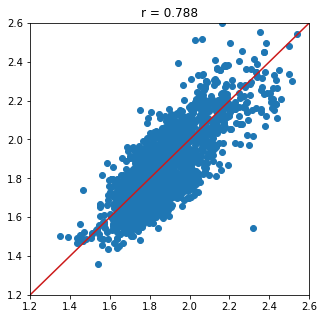

In [9]:
# Remove extreme values
ex = list(np.where(np.absolute(stats.zscore(ldataarr)) >= 2.6)[0])
ex.extend(list(np.where(np.absolute(stats.zscore(rdataarr)) >= 2.6)[0]))
idx = list({i for i in range(ldataarr.size)} - set(ex))
indices = random.choices(idx, k = 2000)

plt.figure(figsize = (5, 5))
plt.scatter(ldataarr[indices], rdataarr[indices])
plt.plot([0, 3], [0, 3], color = [0.8, 0.1, 0.1])
plt.xlim([1.2, 2.6])
plt.ylim([1.2, 2.6])
plt.title(f'r = {stats.pearsonr(ldataarr[indices], rdataarr[indices])[0]:.3f}')
plt.show()

<Figure size 720x288 with 0 Axes>

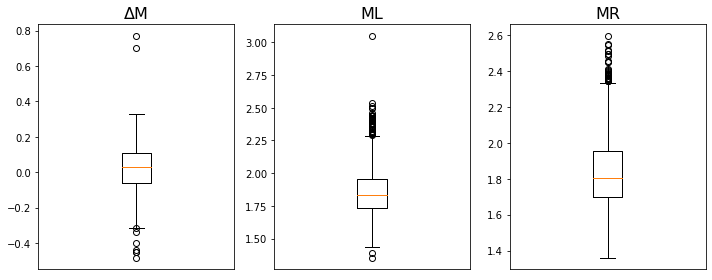

In [10]:
plt.figure(figsize = (10, 4))
subplots, axes = plt.subplots(1, 3, figsize = (10, 4))
axes[0].boxplot(ldataarr[indices] - rdataarr[indices])
axes[0].set_xticks([])
axes[0].set_title('ΔM', fontsize = 16)
axes[1].boxplot(ldataarr[indices])
axes[1].set_xticks([])
axes[1].set_title('ML', fontsize = 16)
axes[2].boxplot(rdataarr[indices])
axes[2].set_xticks([])
axes[2].set_title('MR', fontsize = 16)
# plt.title(f'Subject {subject}')
subplots.tight_layout()
plt.show()

In [10]:
def getobj(name):
    return nibabel.load(os.path.join(subdir, name))
surf = getobj(f'{subject}.L.inflated.32k_fs_LR.surf.gii')

newarr = ldataarr - rdataarr + 5
ldata.darrays[0].data = newarr
nibabel.save(ldata, os.path.join(WORKDING_PATH, f'{subject}.Myelin.L-R.func.gii'))
!zip -r ./example.zip ./example/

# Examine ROIs with MMP parcellation

In [4]:
GROUPDIR = '/nfs/p1/public_dataset/datasets/hcp/DATA/HCP_S1200_GroupAvg_v1/HCP_S1200_GroupAvg_v1'
MMP = nibabel.load(os.path.join(GROUPDIR,
    'Q1-Q6_RelatedValidation210.CorticalAreas_dil_Final_Final_Areas_Group_Colors.32k_fs_LR.dlabel.nii'))
def getROI(roi_id):
    return np.where(MMP.get_fdata()[0] == roi_id)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [48]:
myelinMap = nibabel.load(os.path.join(subdir, f'{subject}.MyelinMap.32k_fs_LR.dscalar.nii'))

In [53]:
myelinMap.get_fdata()[0][getROI(2)]

array([2.07725716, 2.05486155, 1.91211975, 1.82463551, 1.78461158,
       2.13715672, 2.0126667 , 1.96688473, 1.89260352, 1.84517741,
       1.83692753, 2.10937095, 1.98308432, 1.96612847, 1.90276325,
       1.83858073, 1.86013329, 2.18706727, 2.12929773, 2.02902937,
       1.97247982, 1.86316812, 1.84216142, 2.1351943 , 2.04627752,
       1.97337151, 1.88874114, 1.84369791, 1.78501058, 2.09156775,
       2.04359031, 1.95944893, 1.87442279, 1.87529993, 1.85066783,
       1.79830873, 1.96780074, 1.91986537, 1.87209547, 1.87762249,
       1.85646045, 1.78061926, 2.02937841, 1.98046446, 1.89950061,
       1.87527215, 1.86153793, 1.78374887, 1.72049308, 2.01463246,
       1.92340636, 1.86545062, 1.8471868 , 1.80551589, 1.78771508,
       1.93038881, 1.89525676, 1.85879195, 1.83349347, 1.79436827,
       1.86929584, 1.87408662, 1.87340283, 1.86117458, 1.82157707,
       1.84122789, 1.87297785, 1.90238047, 1.857916  , 1.83763921,
       1.91128755, 1.92400658, 1.85793817, 1.93560755, 2.02742